In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

def load_data(filepath):

    data = pd.read_csv(filepath)
    
    X = data.drop(columns=['Rings'])  
    y = data['Rings']
    
    
    return X,y

def decision_tree_find_best_params_avg(X, y, selected_features=None, n_splits=10):
    param_grid = {
        'max_depth': [None, 5, 10, 15],
        'criterion': ['gini', 'entropy']
    }
    
    best_params = None
    best_avg_accuracy = 0
    best_avg_f1 = 0
    best_model = None

    for max_depth in param_grid['max_depth']:
            for criterion in param_grid['criterion']:
                params = {
                    'max_depth': max_depth,
                    'criterion': criterion
                }

                accuracies = []
                f1_scores = []
                
                for _ in range(n_splits):
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=_)
                    
                    dt_clf = DecisionTreeClassifier(**params)
                    dt_clf.fit(X_train, y_train.values.ravel())
                    
                    y_pred = dt_clf.predict(X_test)
                    accuracies.append(accuracy_score(y_test, y_pred))
                    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
                
                avg_accuracy = np.mean(accuracies)
                avg_f1 = np.mean(f1_scores)
                
                print(f"Parameters: {params} - Average Accuracy: {avg_accuracy:.4f}, Average F1 Score: {avg_f1:.4f}")
                
                if avg_f1 > best_avg_f1 or (avg_f1 == best_avg_f1 and avg_accuracy > best_avg_accuracy):
                    best_avg_f1 = avg_f1
                    best_avg_accuracy = avg_accuracy
                    best_params = params
                    best_model = dt_clf
    
    print(f"\nBest Parameters: {best_params} - Best Average Accuracy: {best_avg_accuracy:.4f}, Best Average F1 Score: {best_avg_f1:.4f}")
    return best_model, best_params


if __name__ == '__main__':
    X,y = load_data('C:/Users/Admin/Desktop/NN_assignment3/data/abalone.csv')

    decision_tree_find_best_params_avg(X, y, selected_features=None, n_splits=5)


Parameters: {'max_depth': None, 'criterion': 'gini'} - Average Accuracy: 0.5368, Average F1 Score: 0.5373
Parameters: {'max_depth': None, 'criterion': 'entropy'} - Average Accuracy: 0.5409, Average F1 Score: 0.5415
Parameters: {'max_depth': 5, 'criterion': 'gini'} - Average Accuracy: 0.6029, Average F1 Score: 0.5834
Parameters: {'max_depth': 5, 'criterion': 'entropy'} - Average Accuracy: 0.6146, Average F1 Score: 0.5976
Parameters: {'max_depth': 10, 'criterion': 'gini'} - Average Accuracy: 0.5799, Average F1 Score: 0.5734
Parameters: {'max_depth': 10, 'criterion': 'entropy'} - Average Accuracy: 0.5742, Average F1 Score: 0.5684
Parameters: {'max_depth': 15, 'criterion': 'gini'} - Average Accuracy: 0.5457, Average F1 Score: 0.5440
Parameters: {'max_depth': 15, 'criterion': 'entropy'} - Average Accuracy: 0.5407, Average F1 Score: 0.5390

Best Parameters: {'max_depth': 5, 'criterion': 'entropy'} - Best Average Accuracy: 0.6146, Best Average F1 Score: 0.5976


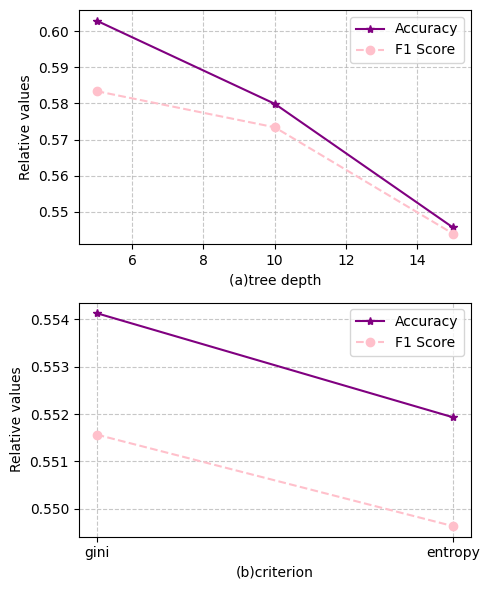

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Define parameter values and metrics for Max Depth
max_depth_values = [None, 5, 10, 15]
accuracy_values = [0.5368, 0.6029, 0.5799, 0.5457]
f1_values = [0.5373, 0.5834, 0.5734, 0.5440]

# Define average metrics for Criterion (averaged across all depths)
criterion_values = ['gini', 'entropy']
gini_accuracy_avg = np.mean([0.5368, 0.5799, 0.5457])
entropy_accuracy_avg = np.mean([0.5409, 0.5742, 0.5407])
gini_f1_avg = np.mean([0.5373, 0.5734, 0.5440])
entropy_f1_avg = np.mean([0.5415, 0.5684, 0.5390])

# Plot Max Depth Analysis
plt.figure(figsize=(5, 6))

plt.subplot(2, 1, 1)
plt.plot(max_depth_values, accuracy_values, marker='*', color='purple', linestyle='-', label='Accuracy')
plt.plot(max_depth_values, f1_values, marker='o', color='pink', linestyle='--', label='F1 Score')
plt.xlabel(r'(a)tree depth')
plt.ylabel('Relative values')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)

# Plot Criterion Analysis (using averaged scores)
plt.subplot(2, 1, 2)
plt.plot(criterion_values, [gini_accuracy_avg, entropy_accuracy_avg], marker='*', color='purple', linestyle='-', label='Accuracy')
plt.plot(criterion_values, [gini_f1_avg, entropy_f1_avg], marker='o', color='pink', linestyle='--', label='F1 Score')
plt.xlabel(r'(b)criterion')
plt.ylabel('Relative values')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



Parameters: {'max_depth': None, 'criterion': 'gini'} - Average Accuracy: 0.5306, Average F1 Score: 0.5304
Parameters: {'max_depth': None, 'criterion': 'entropy'} - Average Accuracy: 0.5395, Average F1 Score: 0.5403
Parameters: {'max_depth': 5, 'criterion': 'gini'} - Average Accuracy: 0.6029, Average F1 Score: 0.5834
Parameters: {'max_depth': 5, 'criterion': 'entropy'} - Average Accuracy: 0.6148, Average F1 Score: 0.5978
Parameters: {'max_depth': 10, 'criterion': 'gini'} - Average Accuracy: 0.5840, Average F1 Score: 0.5779
Parameters: {'max_depth': 10, 'criterion': 'entropy'} - Average Accuracy: 0.5718, Average F1 Score: 0.5662
Parameters: {'max_depth': 15, 'criterion': 'gini'} - Average Accuracy: 0.5467, Average F1 Score: 0.5447
Parameters: {'max_depth': 15, 'criterion': 'entropy'} - Average Accuracy: 0.5368, Average F1 Score: 0.5359

Best Parameters: {'max_depth': 5, 'criterion': 'entropy'} - Best Average Accuracy: 0.6148, Best Average F1 Score: 0.5978


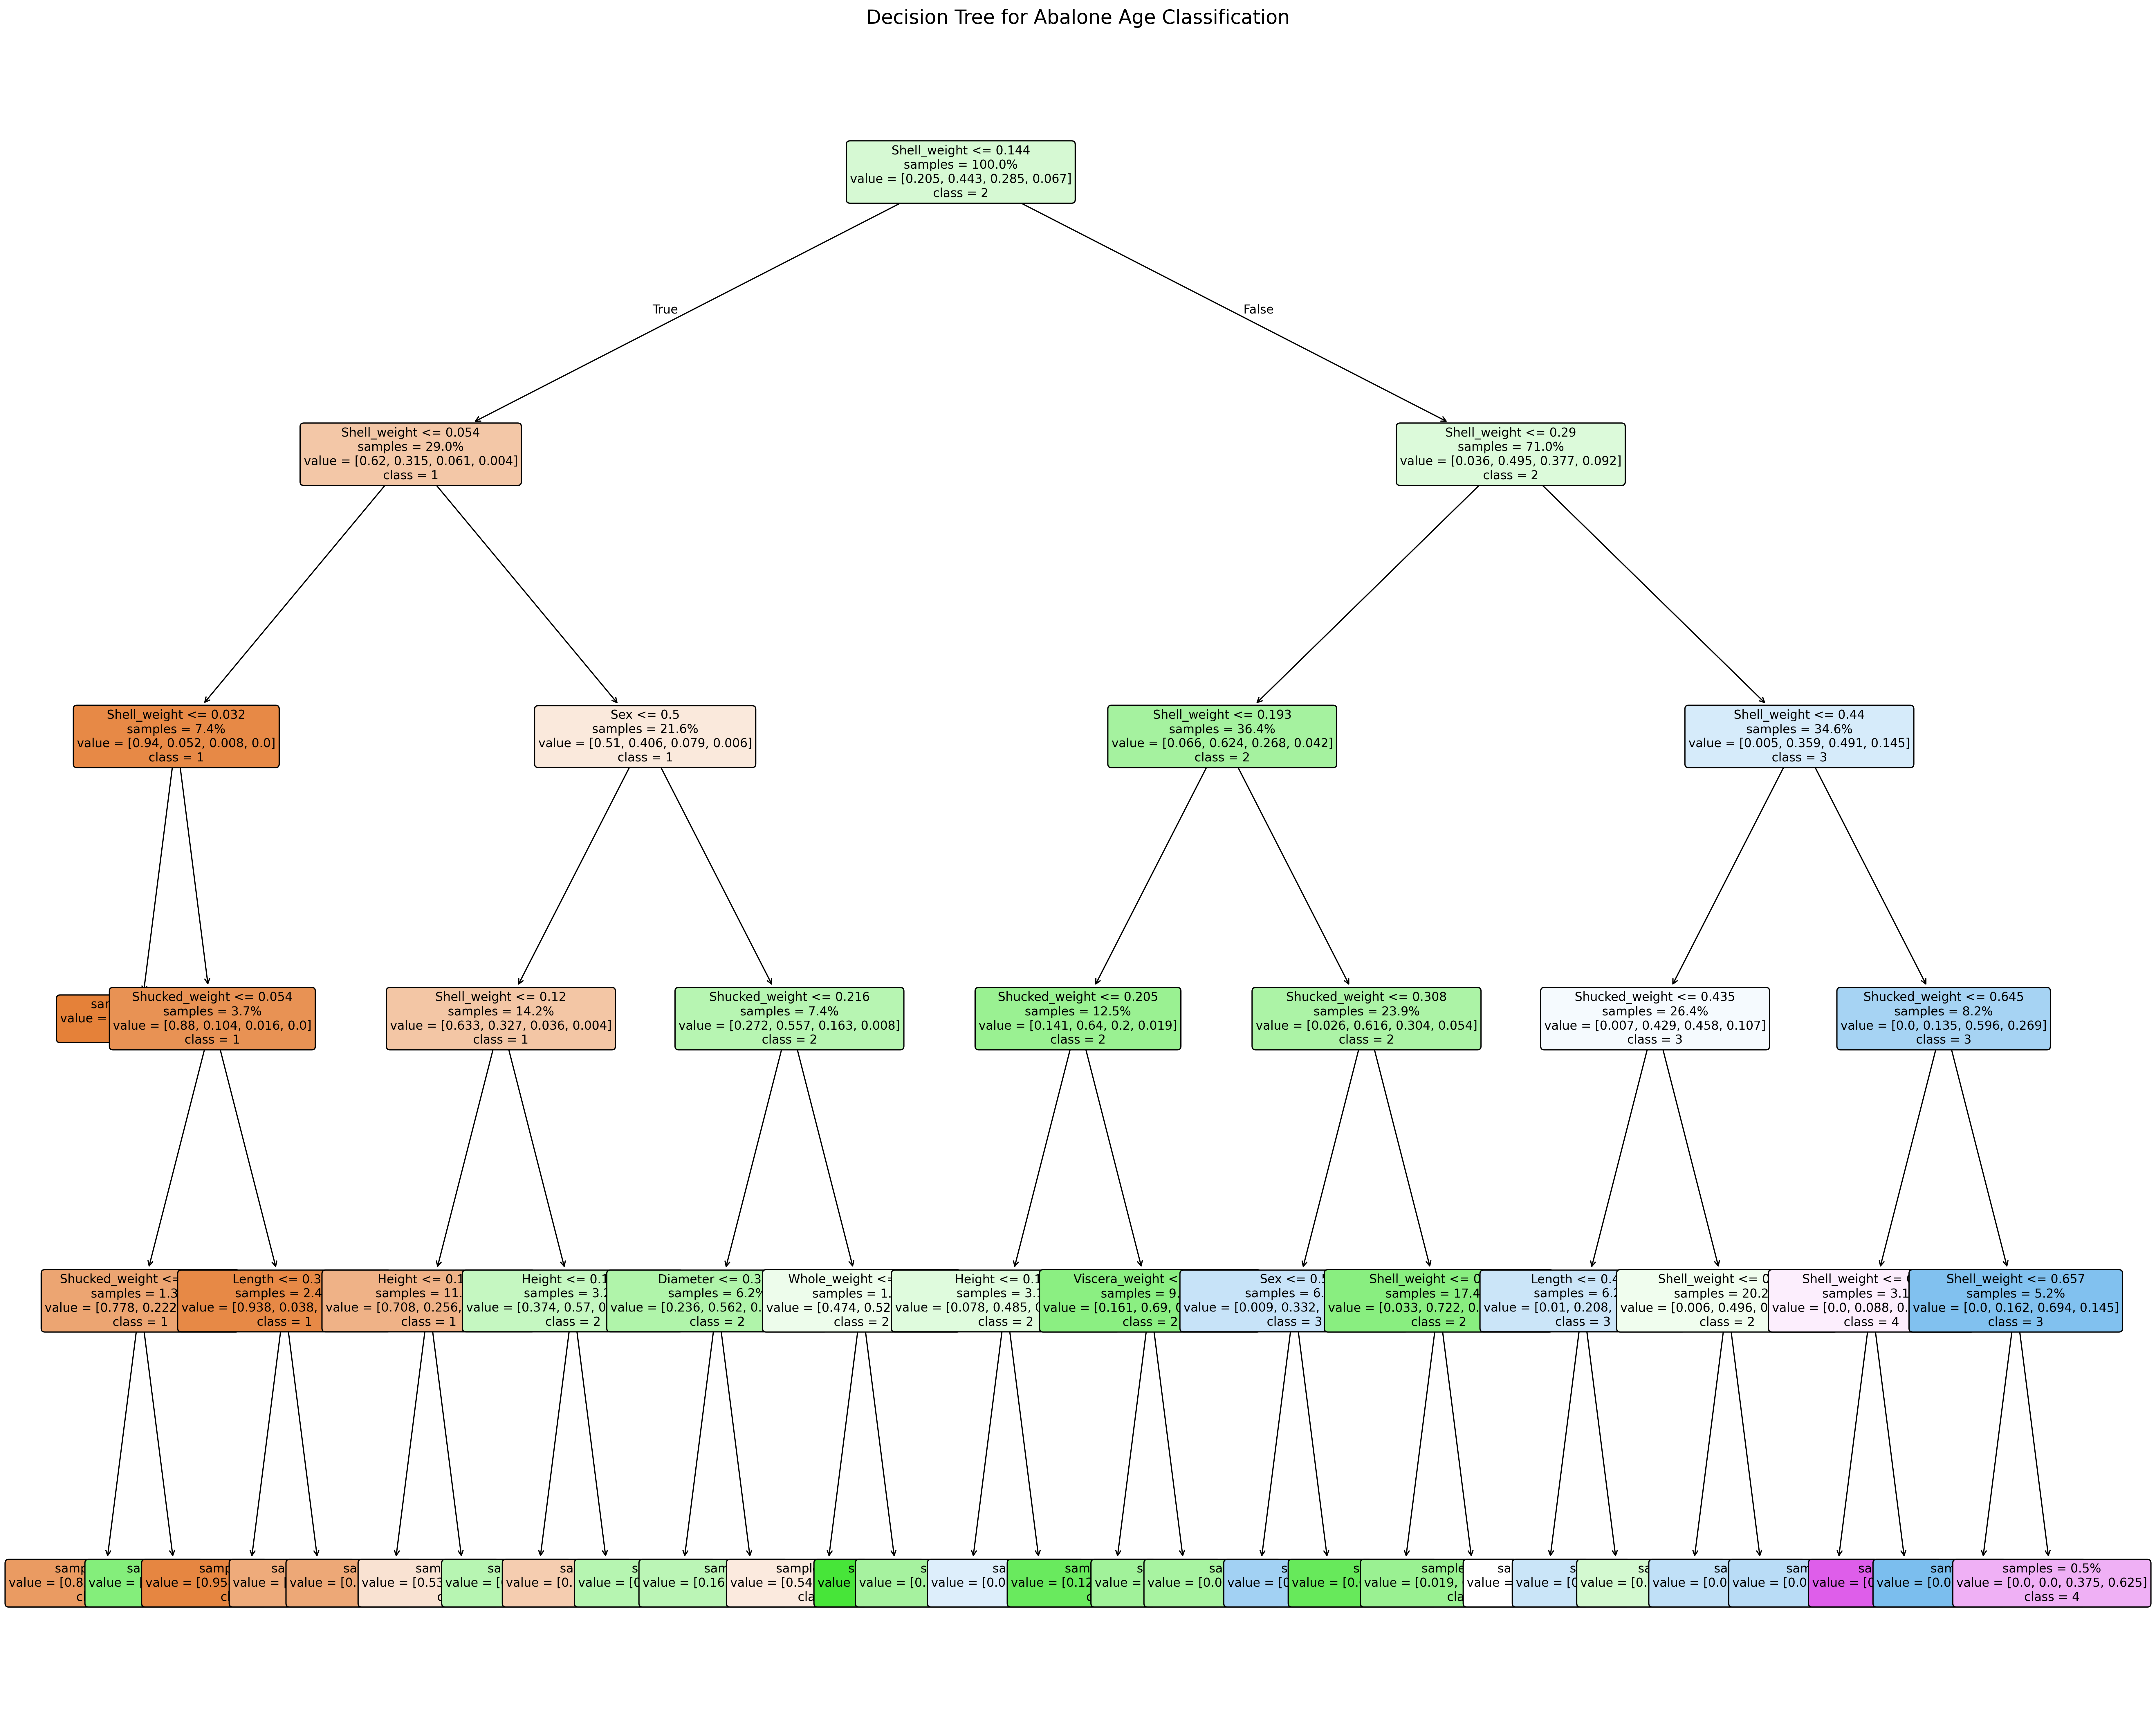

In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def load_data(filepath):
    data = pd.read_csv(filepath)
    X = data.drop(columns=['Rings'])  # Assuming 'Rings' is the target column
    y = data['Rings']
    return X, y

def decision_tree_find_best_params_avg(X, y, n_splits=10):
    param_grid = {
        'max_depth': [None, 5, 10, 15],
        'criterion': ['gini', 'entropy']
    }
    
    best_params = None
    best_avg_accuracy = 0
    best_avg_f1 = 0
    best_model = None

    for max_depth in param_grid['max_depth']:
        for criterion in param_grid['criterion']:
            params = {
                'max_depth': max_depth,
                'criterion': criterion
            }

            accuracies = []
            f1_scores = []
            
            for _ in range(n_splits):
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=_)
                
                dt_clf = DecisionTreeClassifier(**params)
                dt_clf.fit(X_train, y_train)
                
                y_pred = dt_clf.predict(X_test)
                accuracies.append(accuracy_score(y_test, y_pred))
                f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
            
            avg_accuracy = np.mean(accuracies)
            avg_f1 = np.mean(f1_scores)
            
            print(f"Parameters: {params} - Average Accuracy: {avg_accuracy:.4f}, Average F1 Score: {avg_f1:.4f}")
            
            if avg_f1 > best_avg_f1 or (avg_f1 == best_avg_f1 and avg_accuracy > best_avg_accuracy):
                best_avg_f1 = avg_f1
                best_avg_accuracy = avg_accuracy
                best_params = params
                best_model = dt_clf
    
    print(f"\nBest Parameters: {best_params} - Best Average Accuracy: {best_avg_accuracy:.4f}, Best Average F1 Score: {best_avg_f1:.4f}")
    return best_model, best_params


def visualize_tree_for_paper(model, feature_names, class_names):
    plt.figure(figsize=(25,20 ), dpi=300)  # 高分辨率和竖直布局
    plot_tree(
        model,
        feature_names=feature_names,
        class_names=[str(c) for c in np.unique(class_names)],
        filled=True,
        rounded=True,
        impurity=False,        # 隐藏不纯度信息，简化图形
        fontsize=10,           # 适当的字体大小以确保文本显示
        proportion=True        # 节点大小按样本比例缩放
    )
    plt.title("Decision Tree for Abalone Age Classification", fontsize=16)
    plt.tight_layout()  # 自动调整子图参数以使文本适应
    plt.savefig("decision_tree_adaptive_text.png", bbox_inches='tight', pad_inches=0.1)  # 保存为高分辨率PNG
    plt.show()


if __name__ == '__main__':
    X, y = load_data('C:/Users/Admin/Desktop/NN_assignment3/data/abalone.csv')
    best_model, best_params = decision_tree_find_best_params_avg(X, y, n_splits=5)
    
    # Visualize the best Decision Tree
    visualize_tree_for_paper(best_model, X.columns, y)
